# Results

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats
import random
%matplotlib inline 

In [2]:
plt.style.use('seaborn-poster')

## Import experiment data

In [4]:
#experimentData = pd.read_csv('Experiments/3. Real world validation/3. Real world data validation-table_1.csv', skiprows=6)
experimentData = pd.read_csv('Experiments/5. Main Experiment/Experiment_1.csv', skiprows=6)

In [5]:
experimentData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4133314 entries, 0 to 4133313
Data columns (total 29 columns):
 #   Column                                      Dtype  
---  ------                                      -----  
 0   [run number]                                int64  
 1   Close_contact_tracing                       bool   
 2   Reduce_transmissibility_to                  int64  
 3   PCR_Testing                                 bool   
 4   p_days_exposed                              float64
 5   lockdown_from_day_n                         int64  
 6   random_tests_percentage                     float64
 7   p_days_infectious_to_symptomatic            float64
 8   p_days_severe                               float64
 9   p_days_infectious_to_recovery_severe        float64
 10  p_days_critical                             float64
 11  p_days_infectious_to_recovery_asymptomatic  int64  
 12  Agent_size                                  float64
 13  p_days_critical_to_death   

In [ ]:
# Subset columns
cols = ['[run number]', '[step]', 'random_tests_percentage', 'SusceptibleAgents', 'ExposedAgents',\
 'InfectedAAgents', 'InfectedMAgents', 'InfectedSAgents', 'InfectedCAgents', 'RecoveredAgents', 'DeadAgents', \
 'cumulativeConfirmedCases', 'cumulativeConfirmedRandomCases', 'cumulativeNegativeRandomCases']
experimentData = experimentData[cols]

# rename columns
cols = ['run', 'step', 'random_tests_percentage', 'SusceptibleAgents', 'ExposedAgents',\
 'InfectedAAgents', 'InfectedMAgents', 'InfectedSAgents', 'InfectedCAgents', 'RecoveredAgents', 'DeadAgents', \
 'cumulativeConfirmedCases', 'cumulativeConfirmedRandomCases', 'cumulativeNegativeRandomCases']
experimentData.columns = cols

## Group by random tests percentage

In [ ]:
results = experimentData.groupby(['run', 'random_tests_percentage'], as_index=False).agg({'DeadAgents' : 'max'})

In [ ]:
base = results[results['random_tests_percentage'] == 0]
scenario1 = results[results['random_tests_percentage'] == 0.1]
scenario2 = results[results['random_tests_percentage'] == 0.2]
scenario3 = results[results['random_tests_percentage'] == 0.3]
scenario4 = results[results['random_tests_percentage'] == 0.4]
scenario5 = results[results['random_tests_percentage'] == 0.5]

## Calculate difference of two means

The Null hypothesis is that the samples are drawn from populations with the same population means.  If the p-value is smaller than our threshold of 5%, then we have evidence against the null hypothesis of equal population means.

Levene’s test for equal variance can be carried out to check that variances are equal for all samples. The test can be used to check the assumption of equal variances before running a parametric test like One-Way ANOVA in Python. If your data is not following a normal distribution Levene’s test is preferred before Barlett’s.

In [ ]:
from scipy.stats import ttest_ind
from scipy.stats import shapiro
from scipy.stats import levene
from scipy.stats import mannwhitneyu

In [ ]:
a = base.loc[:, 'DeadAgents']
s1 = scenario1.loc[:, 'DeadAgents']
s2 = scenario2.loc[:, 'DeadAgents']
s3 = scenario3.loc[:, 'DeadAgents']
s4 = scenario4.loc[:, 'DeadAgents']
s5 = scenario5.loc[:, 'DeadAgents']

In [ ]:
1.96 + (a.std() / np.sqrt(300))

In [ ]:
def descStats(x):
    CI_lower = x.mean() - (1.96 * (x.std() / np.sqrt(300)))
    CI_upper = x.mean() + (1.96 * (x.std() / np.sqrt(300)))
    return x.mean(), x.std(), CI_lower, CI_upper

In [ ]:
descStats(a)

In [ ]:
descStats(s1)

In [ ]:
descStats(s2)

In [ ]:
descStats(s3)

In [ ]:
descStats(s4)

In [ ]:
descStats(s5)

### Test for Normality

In [ ]:
shapiro(a)

In [ ]:
shapiro(s1)

In [ ]:
shapiro(s2)

In [ ]:
shapiro(s3)

In [ ]:
shapiro(s4)

In [ ]:
shapiro(s5)

### Test for equal variance

In [ ]:
levene(a, s1)

In [ ]:
levene(a, s2)

In [ ]:
levene(a, s3)

In [ ]:
levene(a, s4)

In [ ]:
levene(a, s5)

### Test for difference in means

#### T-Test (parametric)

In [ ]:
ttest_ind(a, s1, axis=0, equal_var=True)

In [ ]:
ttest_ind(a, s2, axis=0, equal_var=False)

In [ ]:
ttest_ind(a, s3, axis=0, equal_var=False)

In [ ]:
ttest_ind(a, s4, axis=0, equal_var=False)

In [ ]:
ttest_ind(a, s5, axis=0, equal_var=False)

#### Mann Whitney U Test (non-parametric)
The hypothesis is one-sided where we want to check whether the number of deaths is greater in a population of 

In [ ]:
mannwhitneyu(a, s1, alternative='greater')

In [ ]:
mannwhitneyu(a, s2, alternative='greater')

In [ ]:
mannwhitneyu(a, s3, alternative='greater')

In [ ]:
mannwhitneyu(a, s4, alternative='greater')

In [ ]:
mannwhitneyu(a, s5, alternative='greater')

## Plots

### Average number of deaths in each scenario

In [ ]:
plotData = experimentData.groupby(['step', 'random_tests_percentage'], as_index=False).agg({'DeadAgents' : 'mean'})

In [ ]:
t = plotData.loc[plotData['random_tests_percentage'] == 0, 'step']
D_base = plotData.loc[plotData['random_tests_percentage'] == 0, 'DeadAgents']
D_1 = plotData.loc[plotData['random_tests_percentage'] == 0.1, 'DeadAgents']
D_2 = plotData.loc[plotData['random_tests_percentage'] == 0.2, 'DeadAgents']
D_3 = plotData.loc[plotData['random_tests_percentage'] == 0.3, 'DeadAgents']
D_4 = plotData.loc[plotData['random_tests_percentage'] == 0.4, 'DeadAgents']
D_5 = plotData.loc[plotData['random_tests_percentage'] == 0.5, 'DeadAgents']

In [ ]:
fig, ax = plt.subplots()

# Plot data
ax.plot(t, D_base, color='grey', linewidth=2, label='Base Scenario')
ax.plot(t, D_1, color='blue', linewidth=2, label='10% Random Testing')
ax.plot(t, D_2, color='brown', linewidth=2, label='20% Random Testing')
ax.plot(t, D_3, color='yellow', linewidth=2, label='30% Random Testing')
ax.plot(t, D_4, color='orange', linewidth=2, label='40% Random Testing')
ax.plot(t, D_5, color='red', linewidth=2, label='50% Random Testing')
plt.axvline(x = 31 * 24, label='Lockdown from day 31', color='grey', linewidth=2, linestyle='--')

# Add titles
ax.set_title('Average number of Dead Agents')
ax.set_xlabel('Hours')
ax.set_ylabel('Average number of deaths')
ax.legend()
plt.show()

# Testing Capacity

In [53]:
experimentData = pd.read_csv('Experiments/5. Main Experiment/Experiment_1.csv', skiprows=6)

In [55]:
experimentData['dailyPCRTestsConducted'].unique()

array([ 0, 11,  9, 10, 13, 14,  7,  5,  1,  2,  4,  3,  6, 16,  8, 12, 19,
       15, 20, 23, 21, 24, 17, 26, 18, 25, 22])

In [56]:
experimentData['day'] = experimentData['[step]'] // 24

In [109]:
experimentData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4133314 entries, 0 to 4133313
Data columns (total 30 columns):
 #   Column                                      Dtype  
---  ------                                      -----  
 0   [run number]                                int64  
 1   Close_contact_tracing                       bool   
 2   Reduce_transmissibility_to                  int64  
 3   PCR_Testing                                 bool   
 4   p_days_exposed                              float64
 5   lockdown_from_day_n                         int64  
 6   random_tests_percentage                     float64
 7   p_days_infectious_to_symptomatic            float64
 8   p_days_severe                               float64
 9   p_days_infectious_to_recovery_severe        float64
 10  p_days_critical                             float64
 11  p_days_infectious_to_recovery_asymptomatic  int64  
 12  Agent_size                                  float64
 13  p_days_critical_to_death   

In [113]:
tests = experimentData.groupby(['day', 'random_tests_percentage'], as_index=False).agg({'cumulativeConfirmedRandomCases' : 'mean', 'cumulativeNegativeRandomCases' : 'mean', 'dailyPCRTestsConducted' : 'mean', 'cumulativeConfirmedCases' : 'mean'})

In [114]:
def prePlotTesting(test, random):
    # data prep
    test = test.loc[test['random_tests_percentage'] == random, :]
    
    test['dailyConfirmedRandomCases'] = test['cumulativeConfirmedRandomCases'].diff().fillna(0)
    test['dailyNegativeRandomCases'] = test['cumulativeNegativeRandomCases'].diff().fillna(0)
    test['dailyConfirmedCases'] = test['cumulativeConfirmedCases'].diff().fillna(0)
    test['totalDailyTestsConducted'] = test['dailyPCRTestsConducted'] + test['dailyConfirmedRandomCases'] + test['dailyNegativeRandomCases']

    return test    

In [115]:
test0 = prePlotTesting(tests, 0)
test10 = prePlotTesting(tests, 0.1)
test20 = prePlotTesting(tests, 0.2)
test30 = prePlotTesting(tests, 0.3)
test40 = prePlotTesting(tests, 0.4)
test50 = prePlotTesting(tests, 0.5)

/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

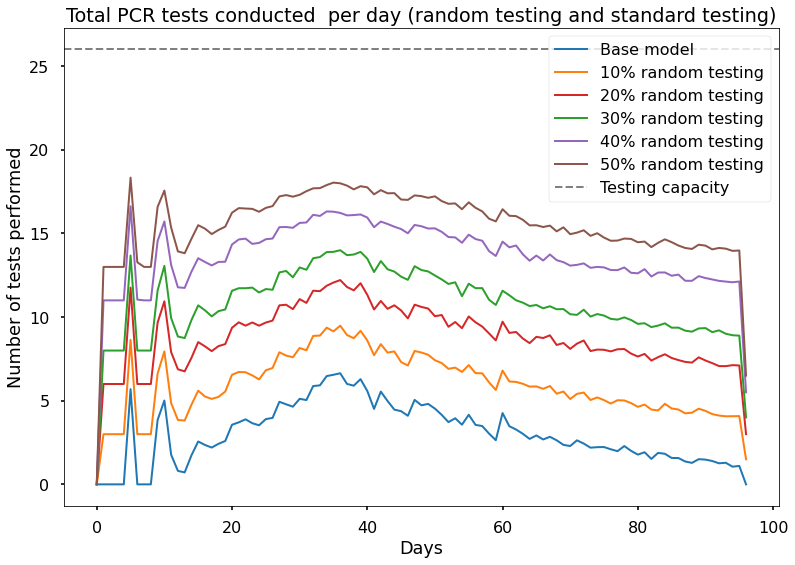

In [116]:
#plot
fig, ax = plt.subplots()

ax.plot(test0['day'], test0['totalDailyTestsConducted'], color='tab:blue', linewidth=2, label='Base model')
ax.plot(test10['day'], test10['totalDailyTestsConducted'], color='tab:orange', linewidth=2, label='10% random testing')
ax.plot(test20['day'], test20['totalDailyTestsConducted'], color='tab:red', linewidth=2, label='20% random testing')
ax.plot(test30['day'], test30['totalDailyTestsConducted'], color='tab:green', linewidth=2, label='30% random testing')
ax.plot(test40['day'], test40['totalDailyTestsConducted'], color='tab:purple', linewidth=2, label='40% random testing')
ax.plot(test50['day'], test50['totalDailyTestsConducted'], color='tab:brown', linewidth=2, label='50% random testing')
plt.axhline(26, label='Testing capacity', color='grey', linewidth=2, linestyle='--')

# Add titles
ax.set_title('Total PCR tests conducted  per day (random testing and standard testing)')
ax.set_xlabel('Days')
ax.set_ylabel('Number of tests performed')
ax.legend()
plt.show()